In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


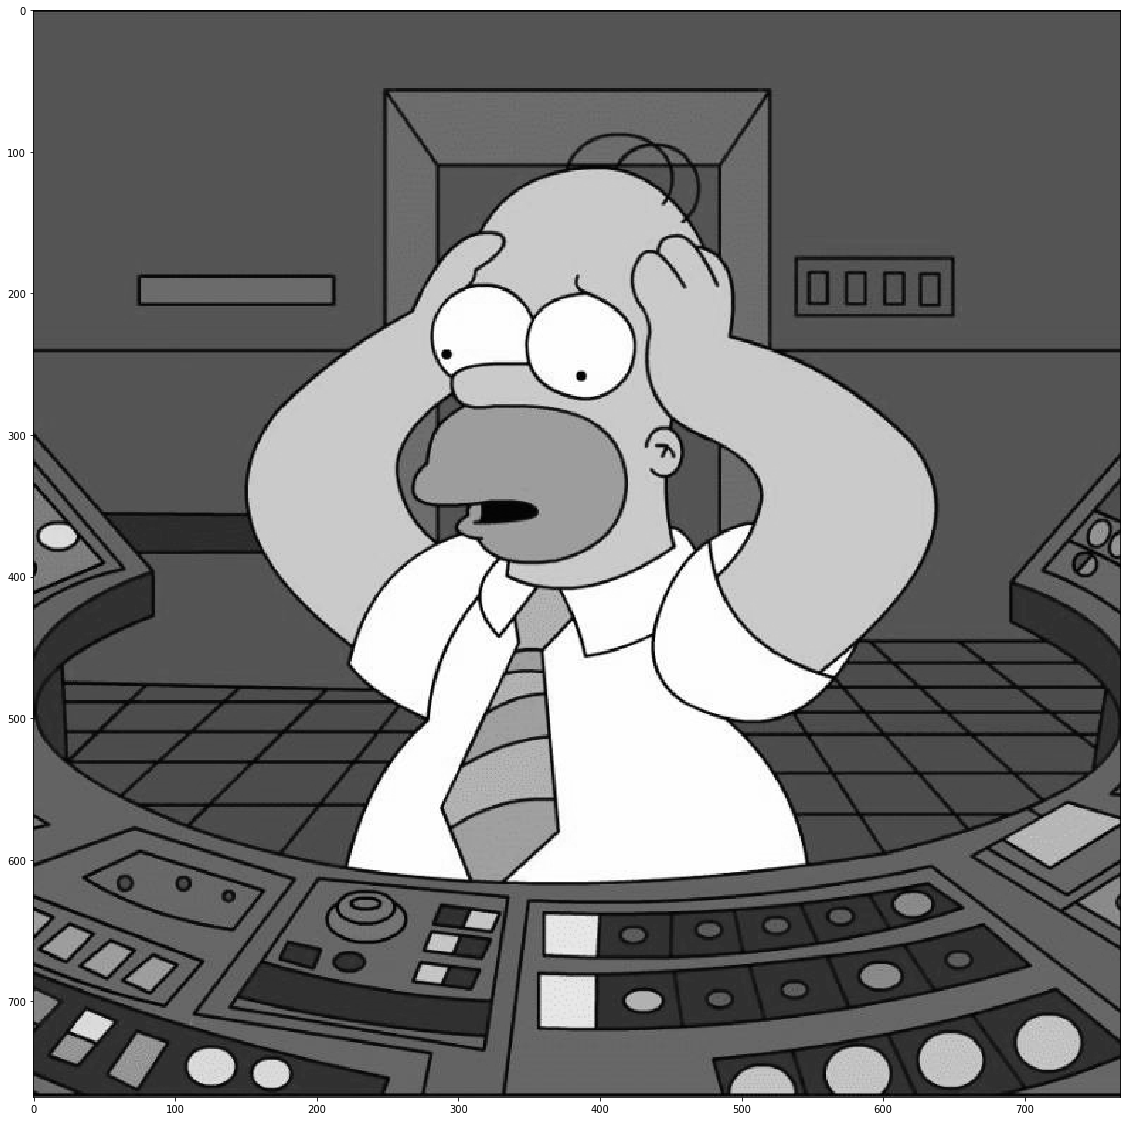

In [2]:
from SLIP import imread
img_orig = imread('homer.jpg')

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img_orig, cmap='gray')

# using torch to build up a pyramid

https://pytorch.org/docs/master/nn.functional.html#torch.nn.functional.interpolate

In [3]:
import torch
img_tens = torch.Tensor(img_orig[None, None, ...])
print('Tensor shape=', img_tens.shape)

Tensor shape= torch.Size([1, 1, 768, 768])


## upsampling / downsampling

Tensor shape= torch.Size([1, 1, 1536, 1536])


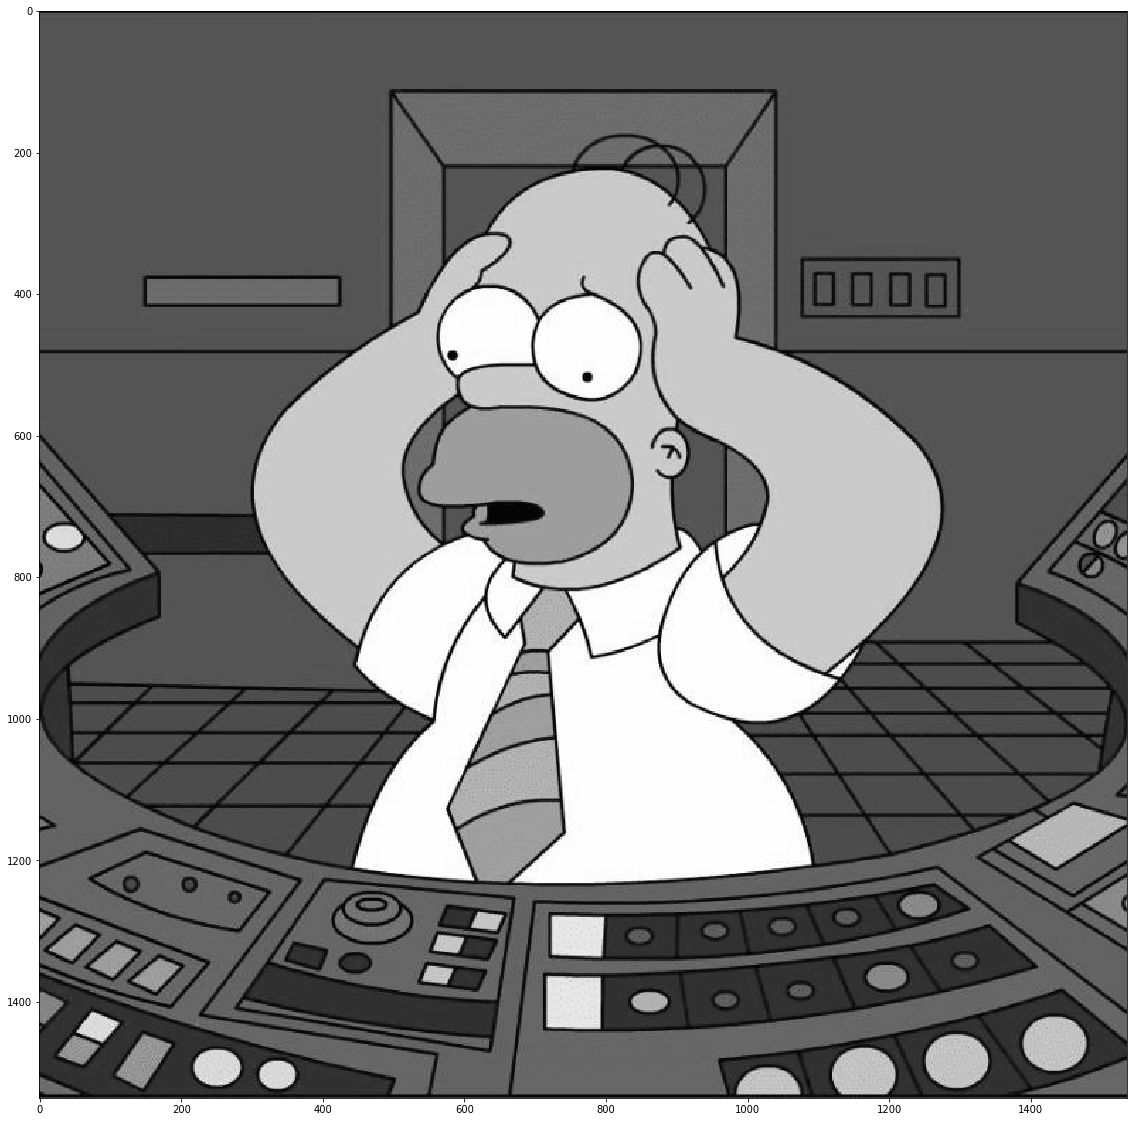

In [4]:
from torch.nn.functional import interpolate
# torch.nn.functional.interpolate(input, size=None, scale_factor=None, mode='nearest', align_corners=None, recompute_scale_factor=None)

img_up = interpolate(img_tens, scale_factor=2, mode='nearest', align_corners=None)
print('Tensor shape=', img_up.shape)
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img_up.numpy()[0, 0, ...], cmap='gray');

In [5]:
import time
for mode in ['nearest', 'bilinear', 'bicubic']:
    t0 = time.time()
    img_up = interpolate(img_tens, scale_factor=2, mode=mode, align_corners=None)
    print(f'Time to compute in mode "{mode}" = {(time.time()-t0)*1000:.3f} ms')
    

Time to compute in mode "nearest" = 11.206 ms
Time to compute in mode "bilinear" = 14.479 ms
Time to compute in mode "bicubic" = 48.408 ms


# pyramid

In [6]:
mode='bilinear'
width = 64
base_levels = 1.61803
base_levels = 2

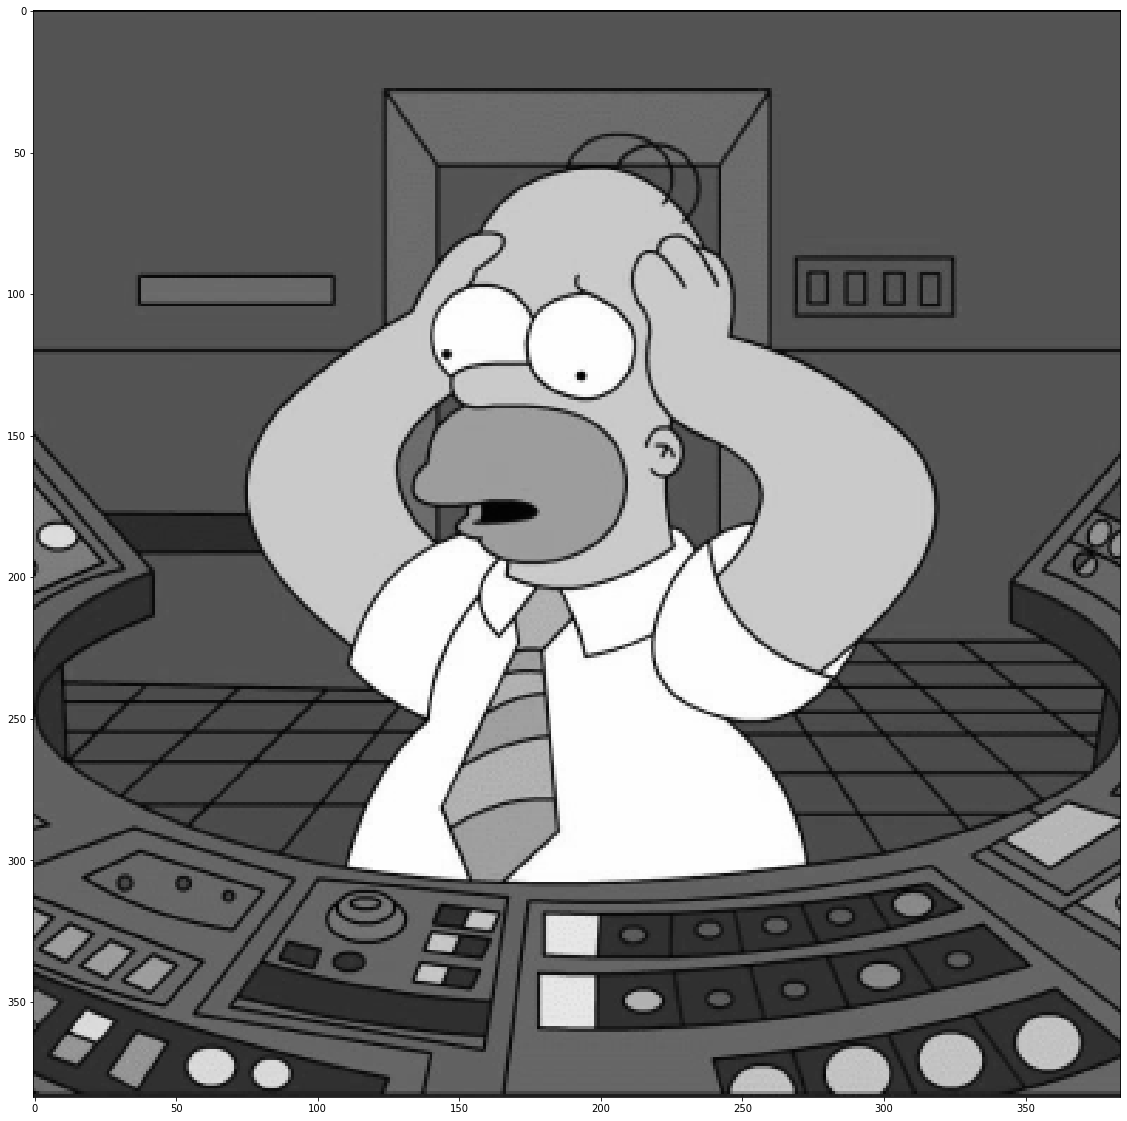

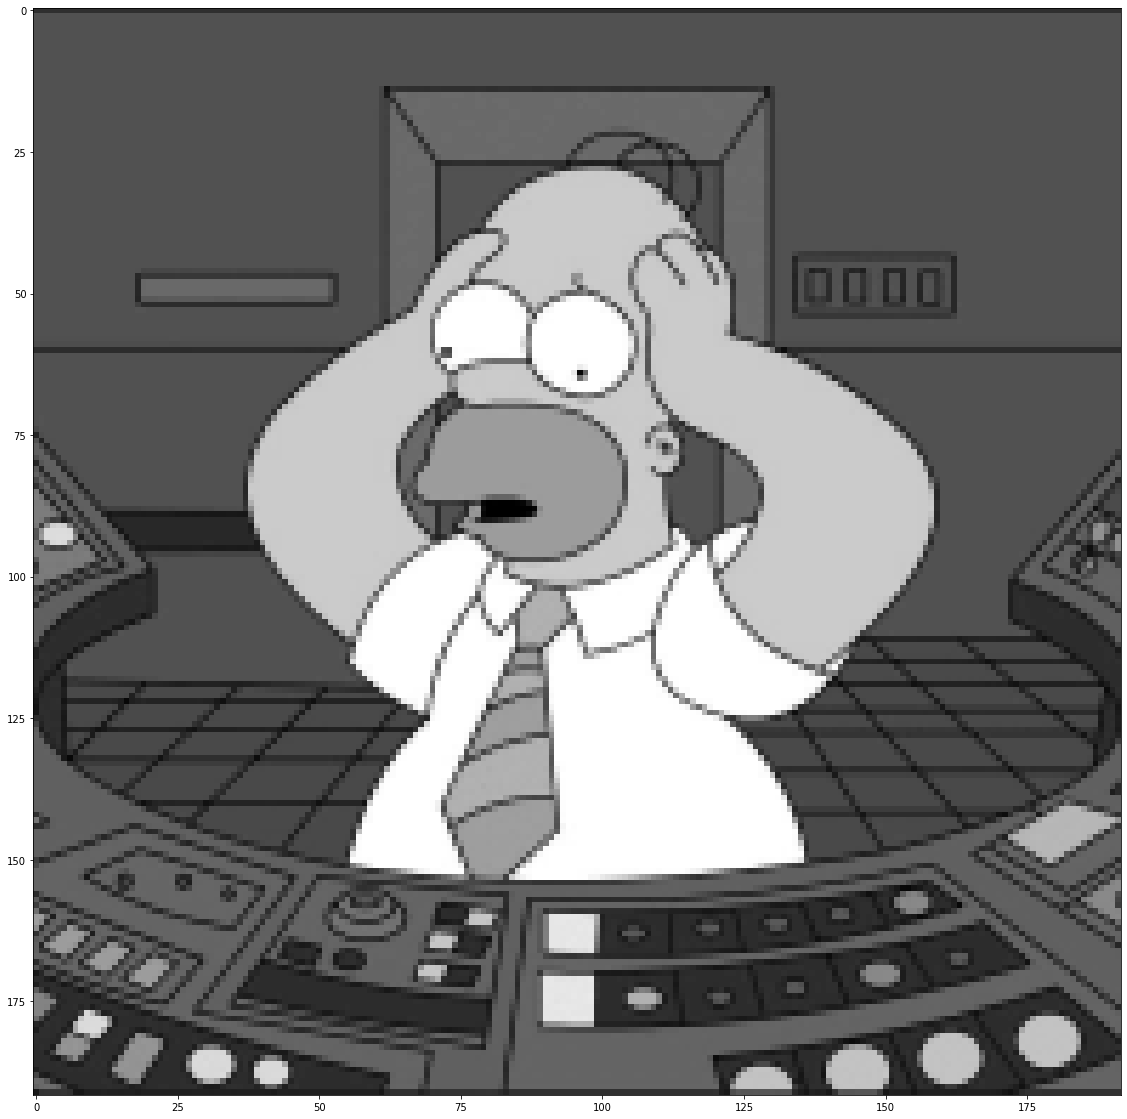

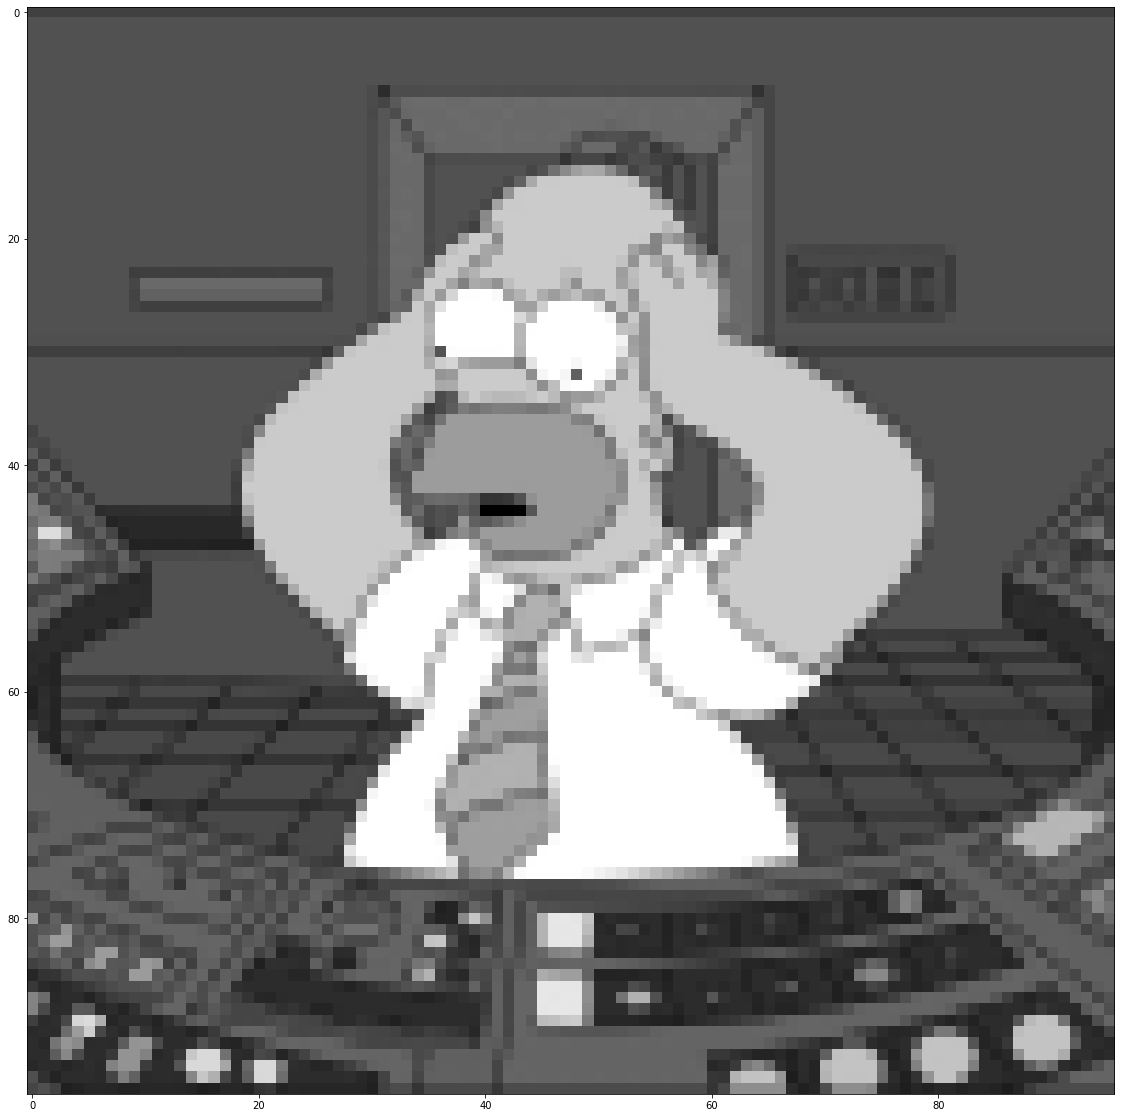

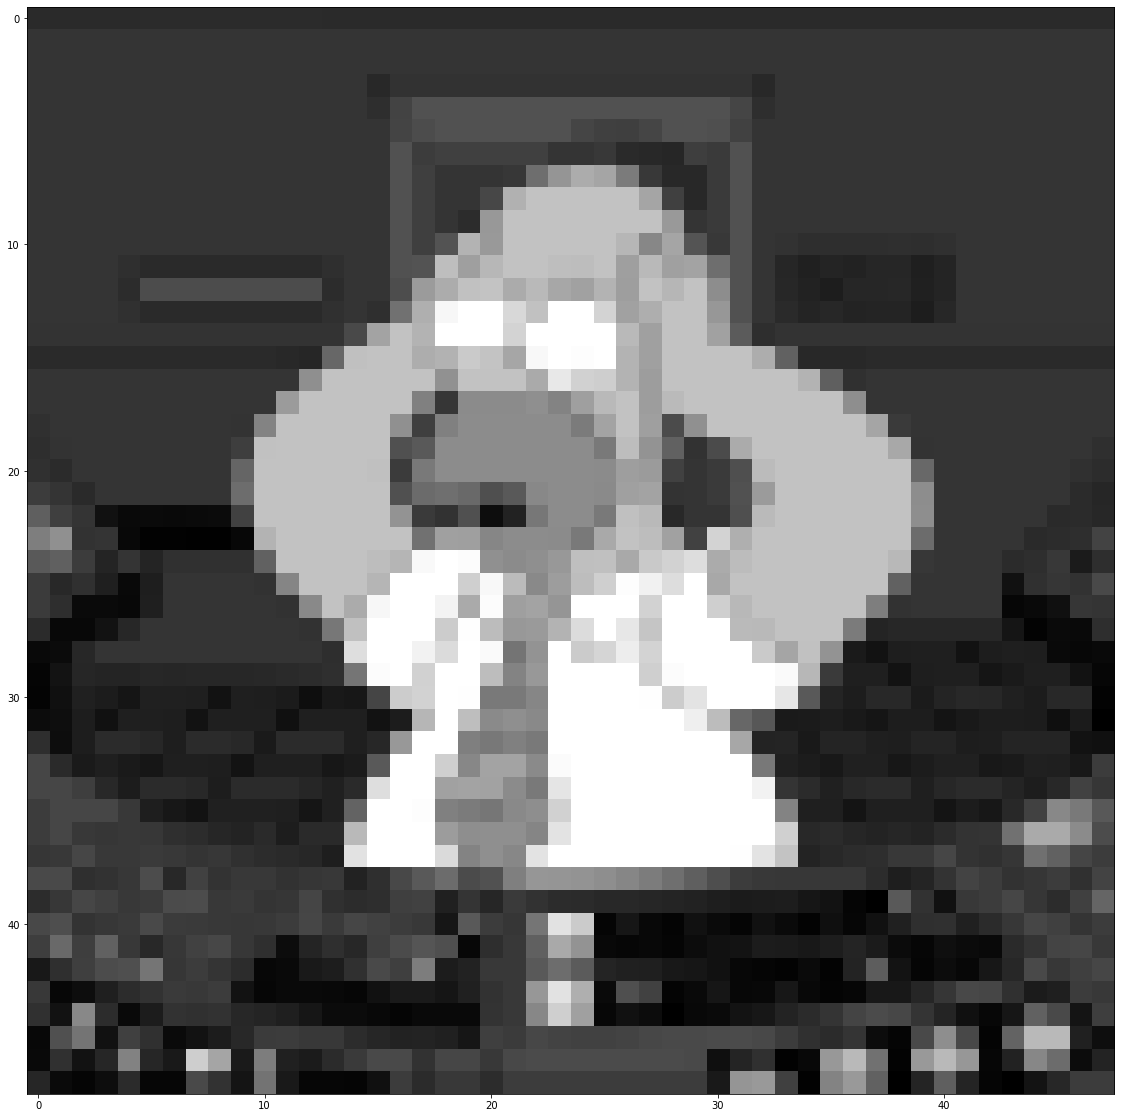

In [7]:
img_down = img_tens

while max(img_down.shape) > width :
    img_down = interpolate(img_down, scale_factor=1/base_levels, mode=mode)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(img_down.numpy()[0, 0, ...], cmap='gray')
    plt.show();


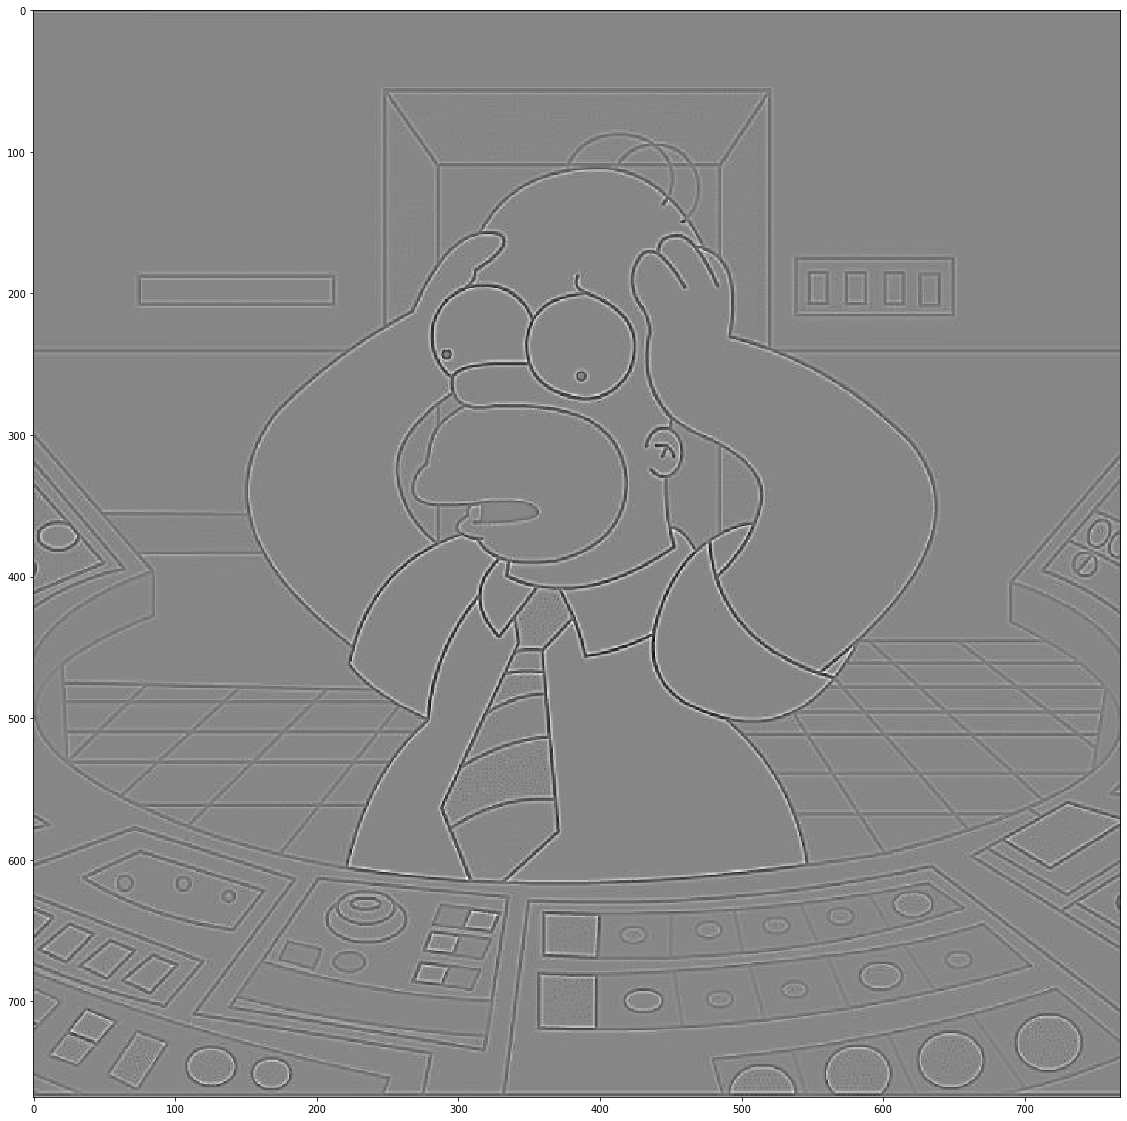

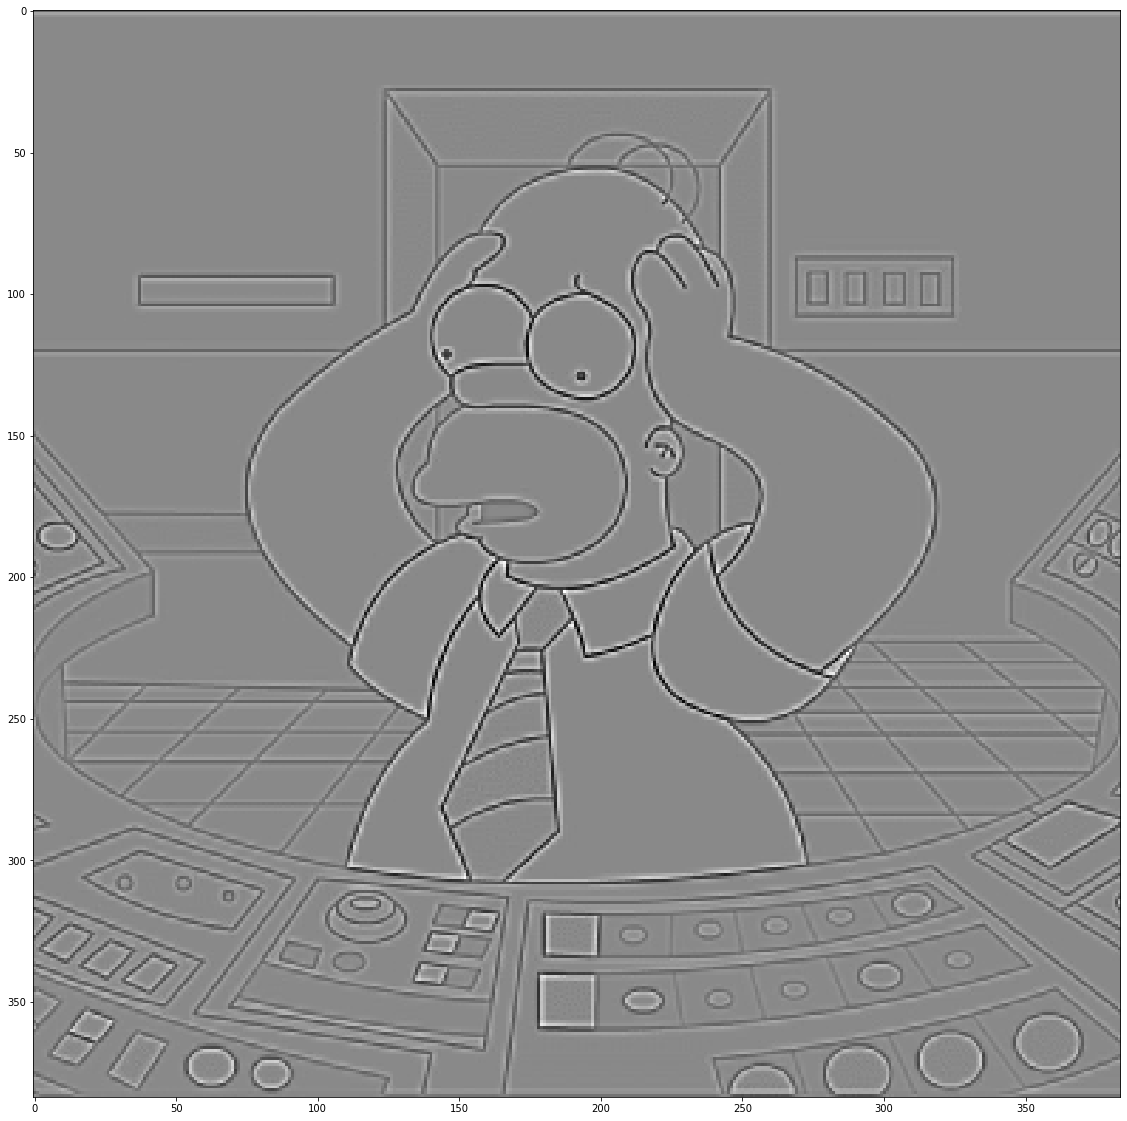

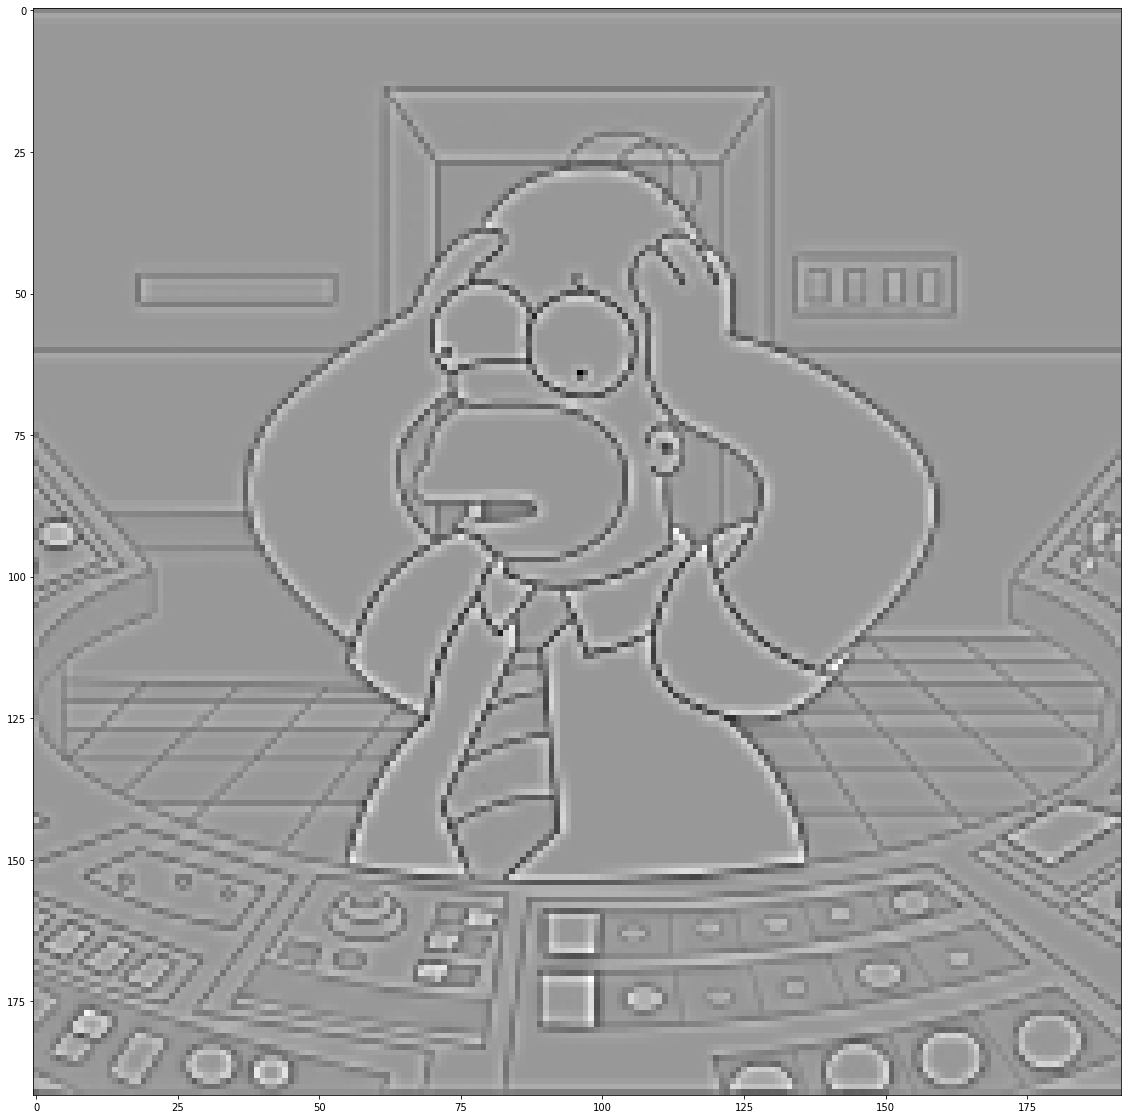

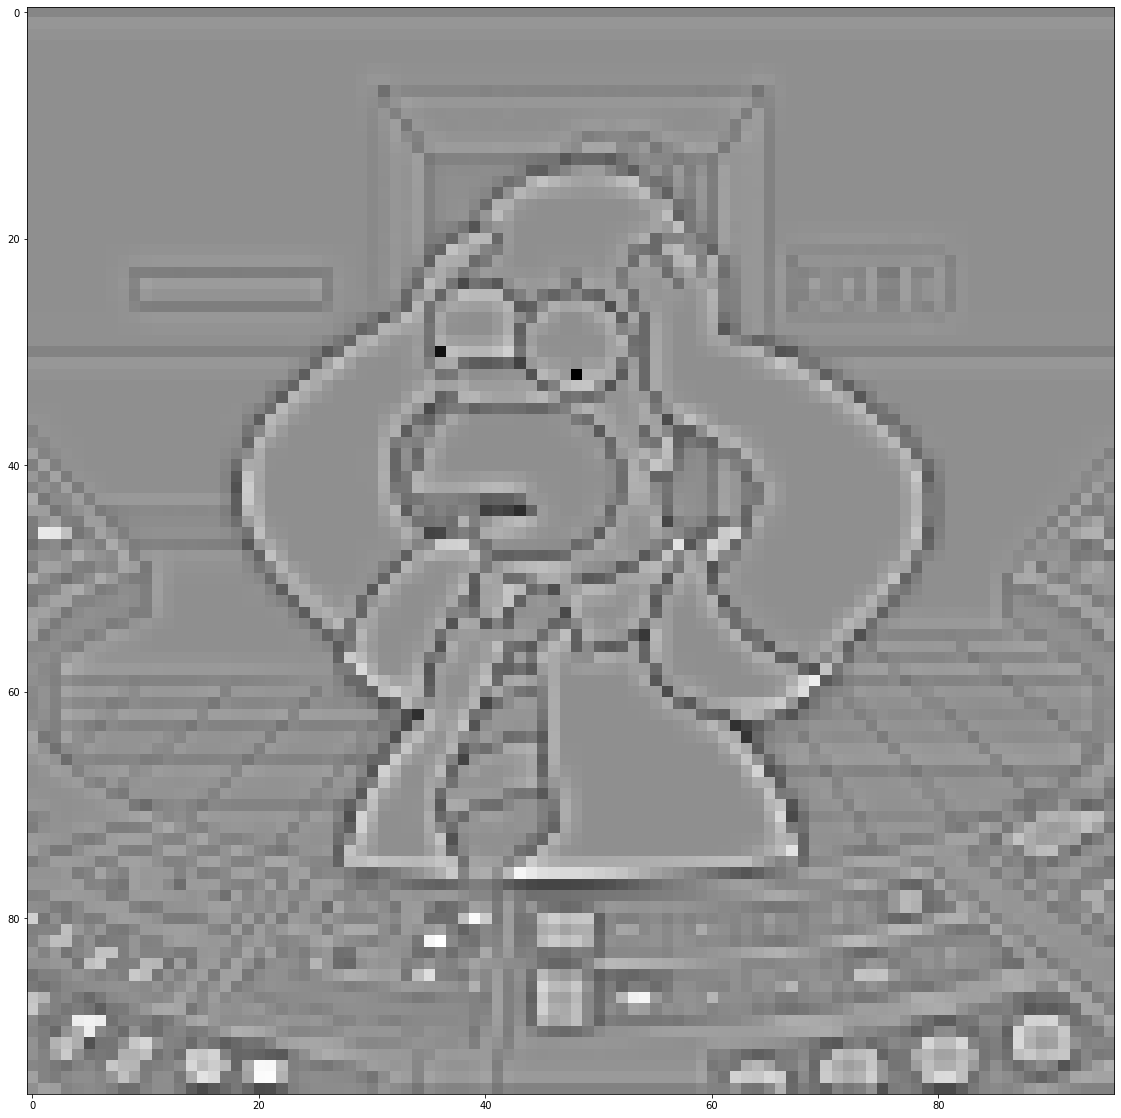

In [8]:
img_tens = torch.Tensor(img_orig[None, None, ...])
img_down = img_tens

while max(img_down.shape) > width :
    img_residual = img_down
    img_down = interpolate(img_down, scale_factor=1/base_levels, mode=mode)
    img_residual -= interpolate(img_down, size=img_residual.shape[-2:], mode=mode)
    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(img_residual.numpy()[0, 0, ...], cmap='gray')
    plt.show();


Reconstruction : 

In [12]:
img_tens = torch.Tensor(img_orig[None, None, ...])
img_down = img_tens
img_residuals = []

while max(img_down.shape) > width :
    img_residual = img_down
    img_down = interpolate(img_down, scale_factor=1/base_levels, mode=mode)
    img_residual -= interpolate(img_down, size=img_residual.shape[-2:], mode=mode)
    
    img_residuals.append(img_residual)

#    fig, ax = plt.subplots(figsize=(20,20))
#    ax.imshow(img_down.numpy()[0, 0, ...], cmap='gray')
#    plt.show();
    

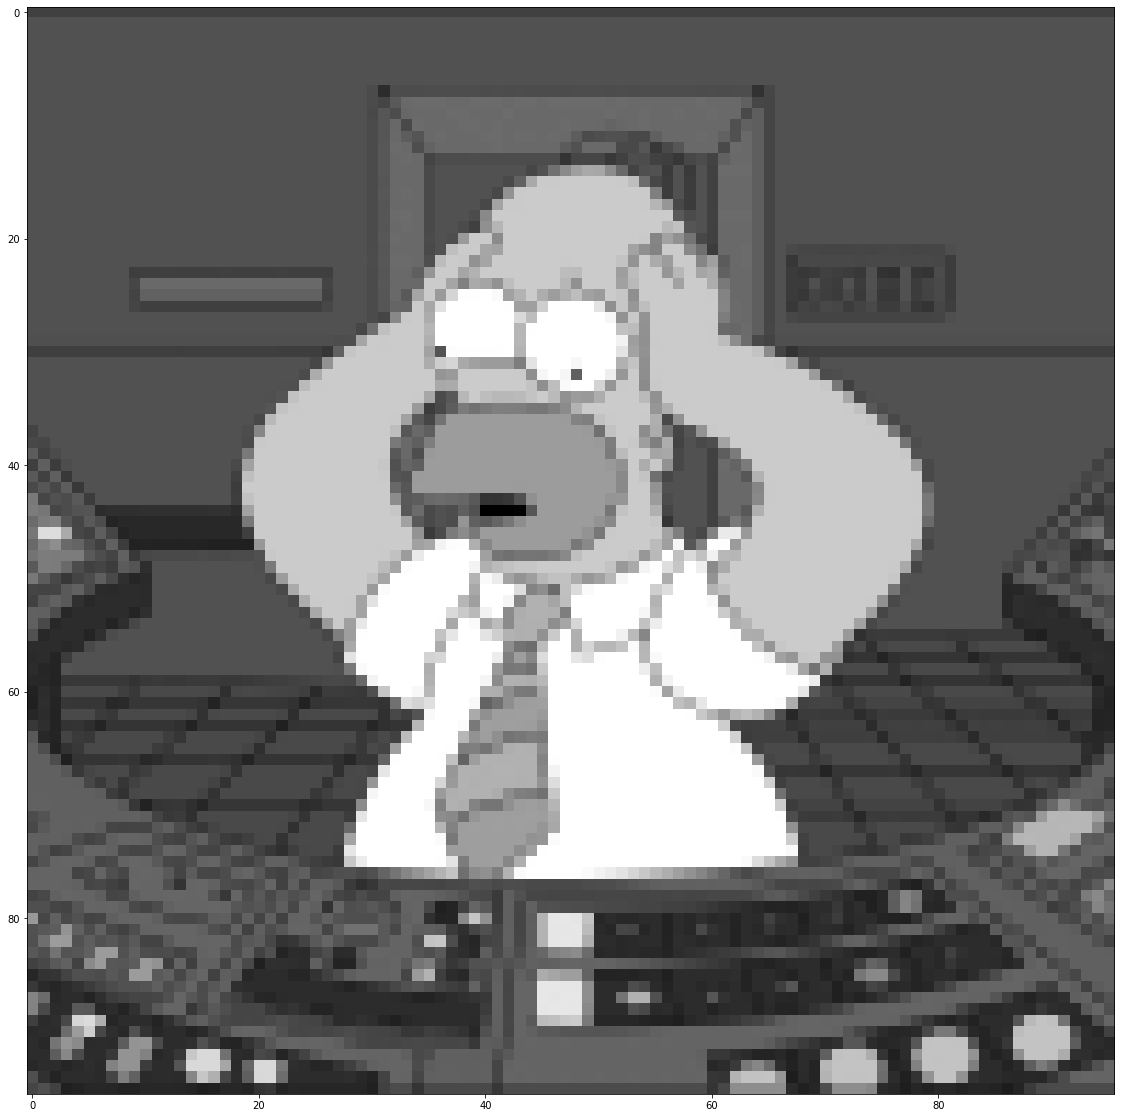

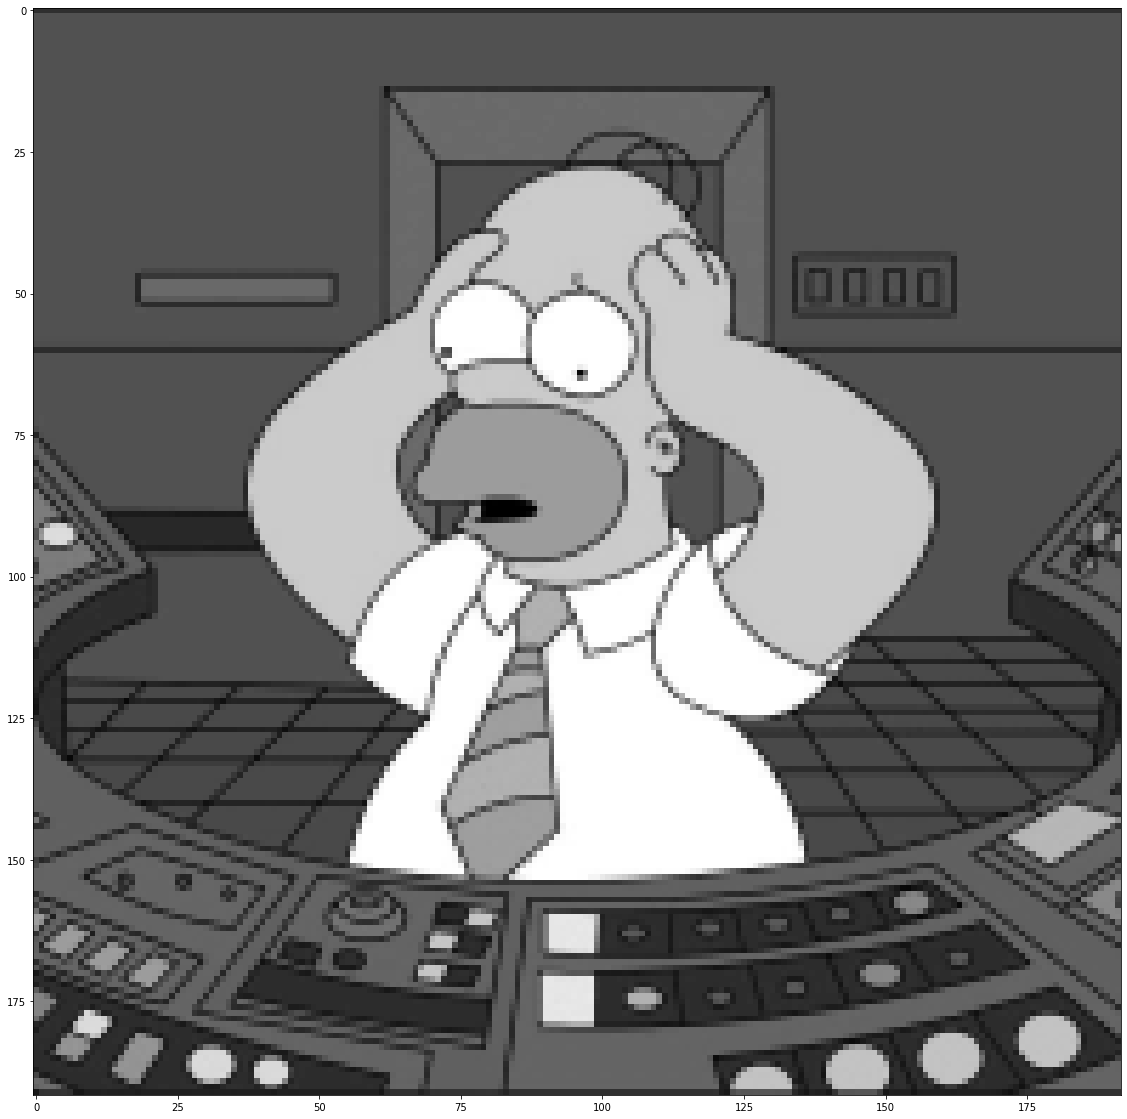

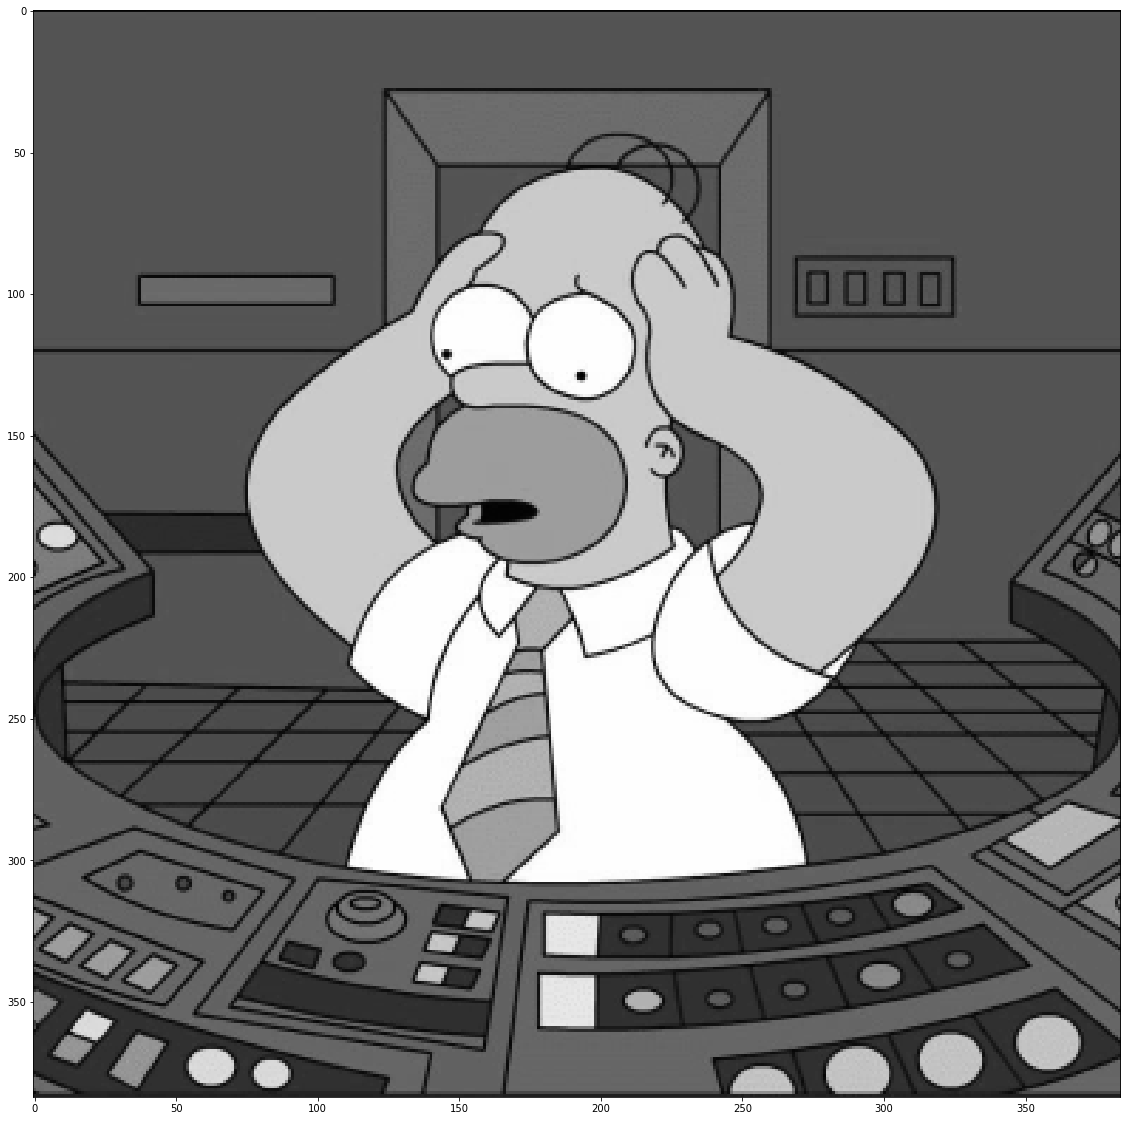

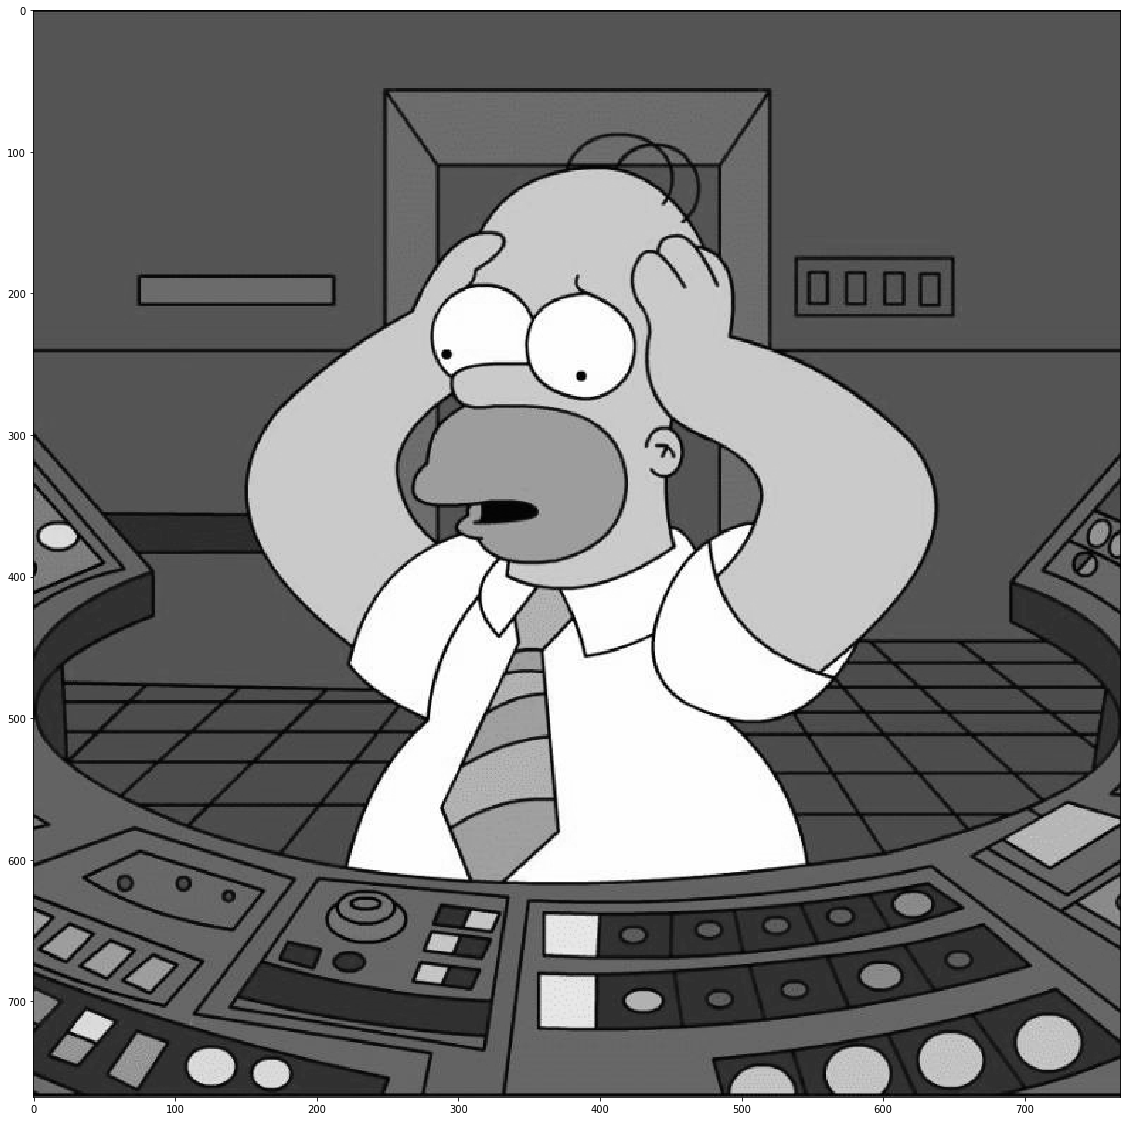

In [10]:
img_rec = img_down
for img_residual in img_residuals[::-1]: # reverse list
    img_rec = interpolate(img_rec, size=img_residual.shape[-2:], mode=mode)
    img_rec += img_residual

    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(img_rec.numpy()[0, 0, ...], cmap='gray')
    plt.show();

Applying on the central crop of $64\times64$

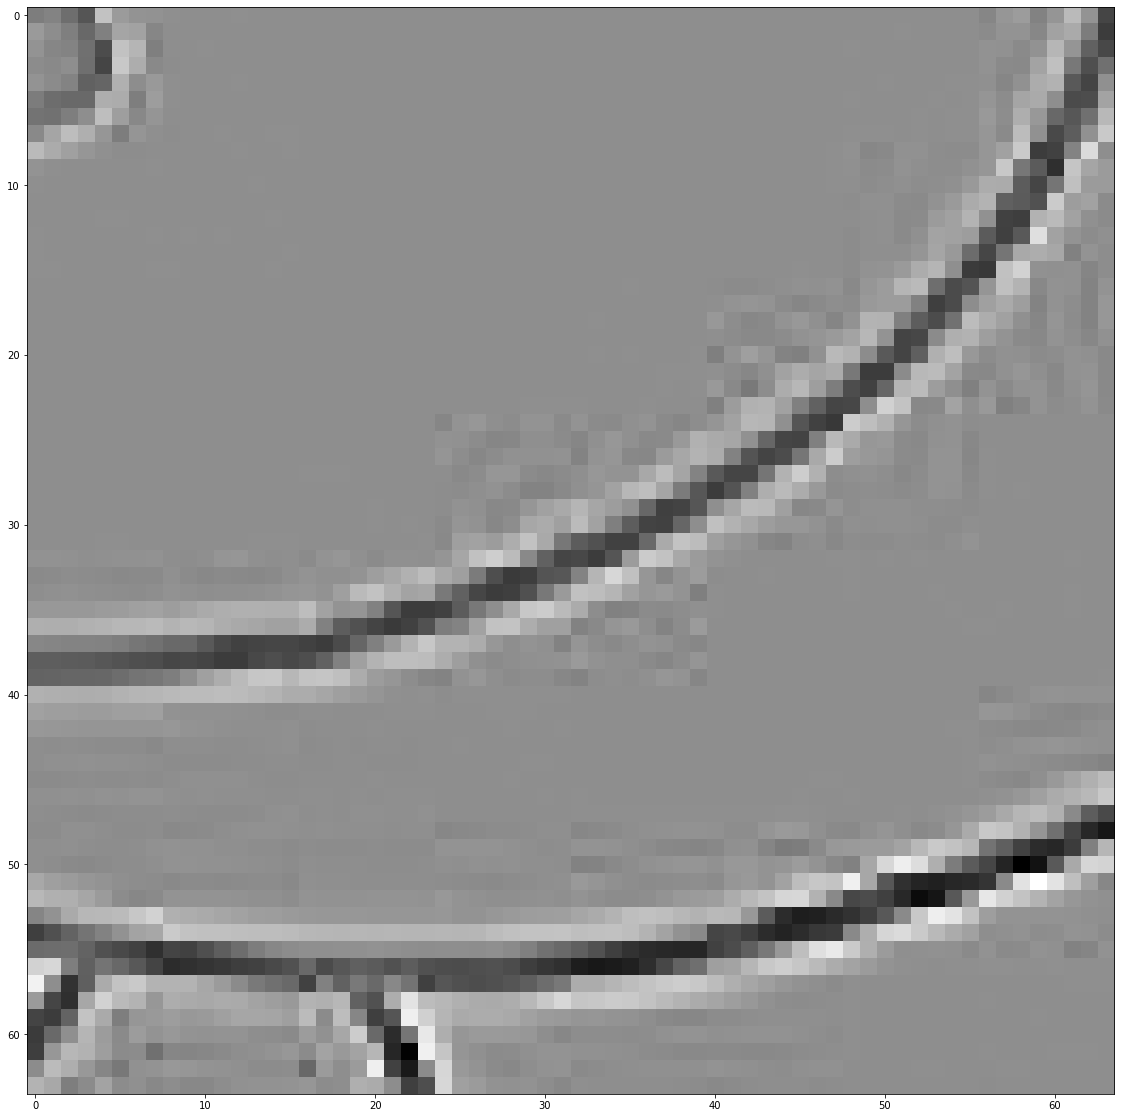

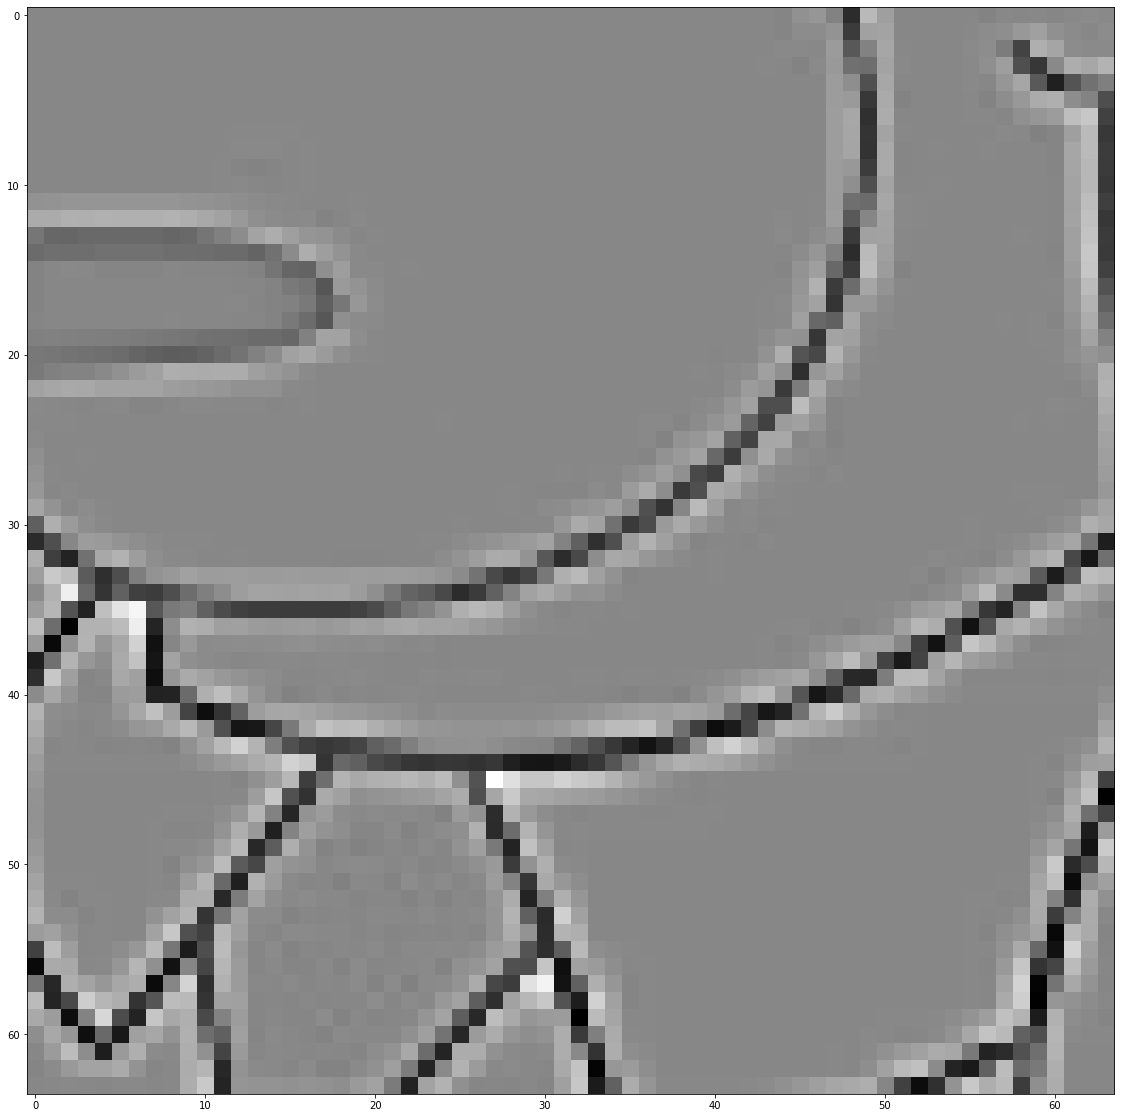

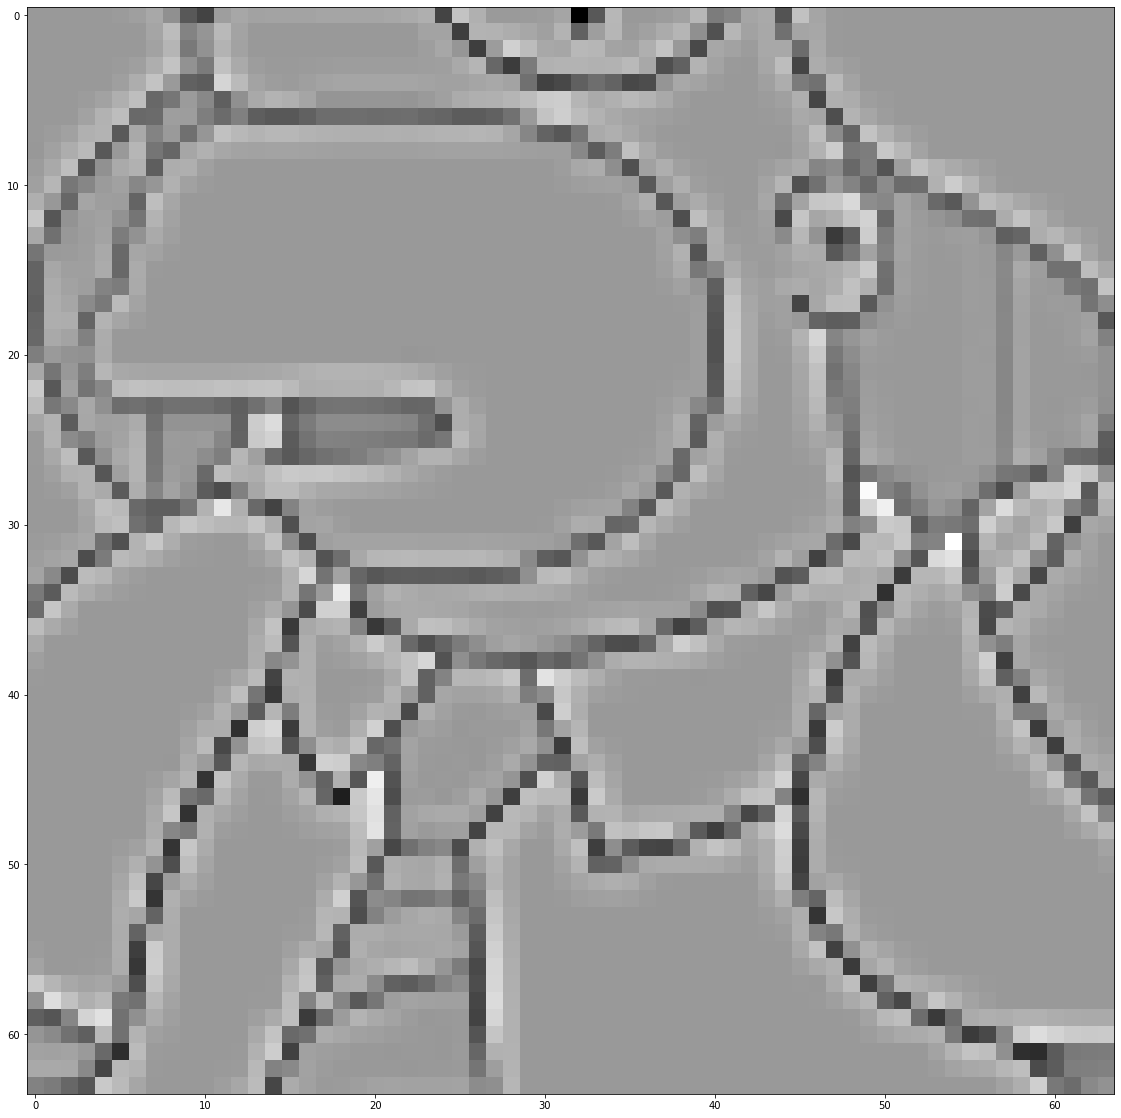

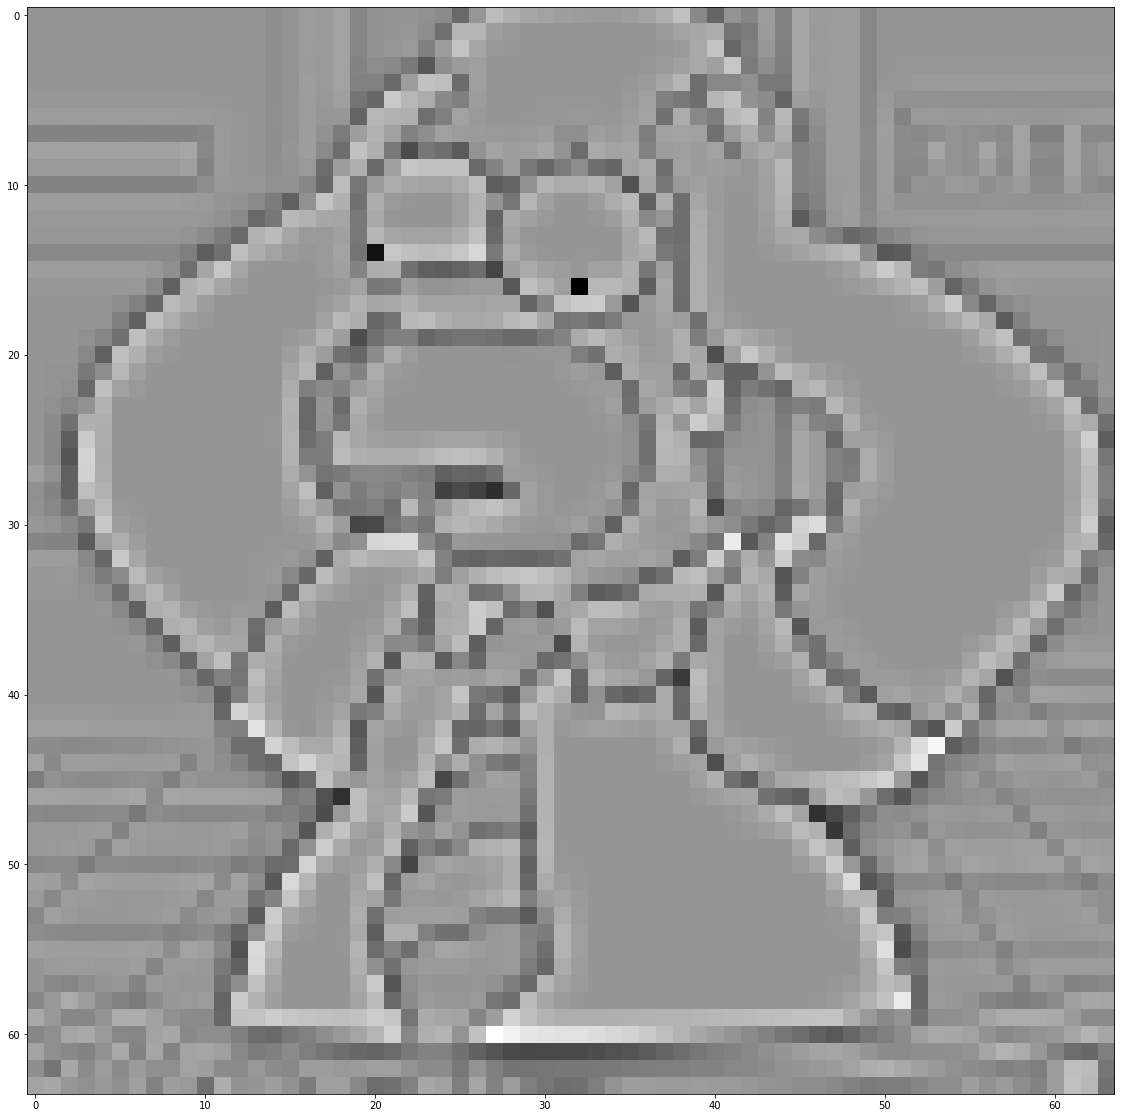

In [11]:
img_tens = torch.Tensor(img_orig[None, None, ...])
img_down = img_tens

while max(img_down.shape) > width :
    img_residual = img_down
    img_down = interpolate(img_down, scale_factor=1/base_levels, mode=mode)
    img_residual -= interpolate(img_down, size=img_residual.shape[-2:], mode=mode)
    
    img_crop = img_residual.numpy()[0, 0, :, :]
    h_res, w_res= img_crop.shape
    img_crop = img_crop[(h_res//2-width//2):(h_res//2+width//2), 
                        (w_res//2-width//2):(w_res//2+width//2)]
    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(img_crop, cmap='gray')
    plt.show();
